<hr>

# **Understanding the ACF and PACF**

<hr>


**Step 1 - Import the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<hr>

**Step 2 - Data Loading**

In [ ]:
df = pd.read_csv("/content/ICProductionData.csv")

**Inspect**

In [ ]:
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


**Rename**

In [ ]:
df.rename(columns = {
    "DATE": 'Date',
    "IPN31152N": 'Production'
}, inplace = True)

In [ ]:
df.head()

,Date,Production
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


**Converting the `Date` into date and making it as index**

In [ ]:
df['Date'] = pd.to_datetime(df.Date)

In [ ]:
df.set_index('Date',inplace = True)

In [ ]:
df.head()

,Production
Date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [ ]:
df.shape

(577, 1)

**Limiting the records starting from 2008 to last, since we are just working with PACF and ACF**

In [ ]:
strDate = pd.to_datetime('2010-01-01')
df = df[strDate:]

In [ ]:
df.head()

,Production
Date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


**Visualizing the data**

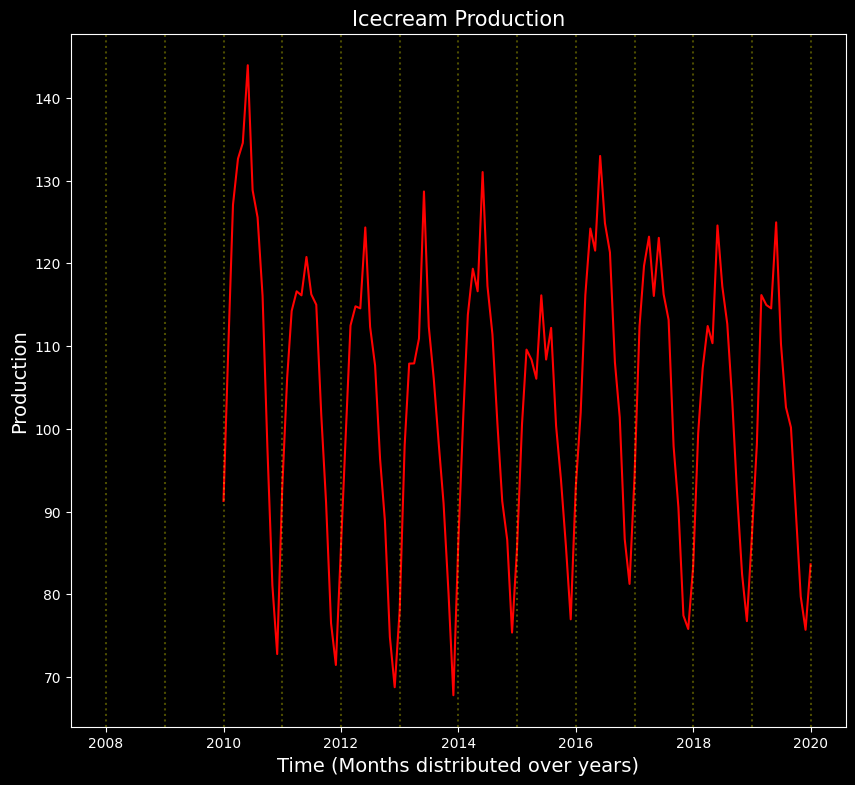

In [ ]:
# set size
plt.figure(figsize = (10, 9))
# plot the production
plt.plot(df.Production, color = 'red')
# updation with layout
plt.title("Icecream Production", fontsize = 15)
plt.xlabel("Time (Months distributed over years)", fontsize = 14)
plt.ylabel("Production", fontsize = 14)
# for seperating the time sequence with each other
for x in range(2008, 2021):
  plt.axvline(pd.to_datetime(str(x) + '-01-01'), color = 'yellow', linestyle = 'dotted', alpha = 0.3)

**Highest is the peak, since in the year the most icecreams are produced in the summers hence there are peaks in the mid (April, May, June, July) and then there is decline to the closing of the year**

<hr>

**Plotting ACF and PACF**

ACF

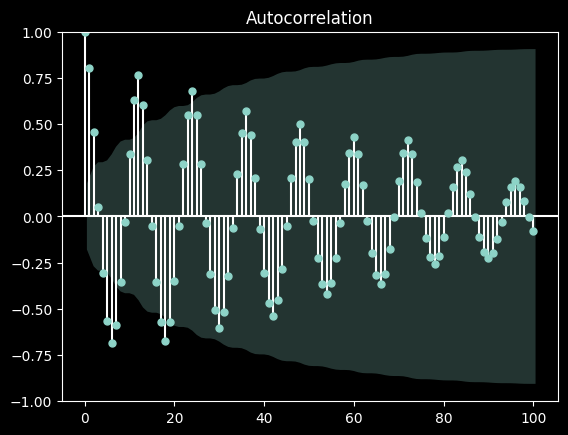

In [ ]:
acf_plot = plot_acf(df.Production, lags = 100)

**Insights**
  * **AR Model, we would expect there is minimizing characteristic, that is what exactly is happening over here, means we are dealing with the AR Model**

PACF

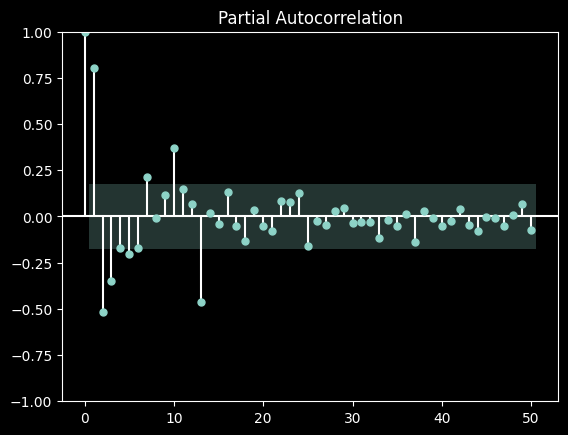

In [ ]:
pacf_plot = plot_pacf(df.Production, lags = 50)

Insights
 * **There are strong peaks at 1, 2, 3, 10 and henceforth and so on**
 * **This suggest that we can make model with values 1, 2, 3, and 10 and so on**

**It gives us a headstart to the time series that we are going to build**

<hr>
<hr>
<hr>

**Working with stocks data**

In [ ]:
import yfinance as yf

**Loading the data for specified companies**

In [ ]:
# symbol for company (tickerSymbol)
sym = 'SPY'

**Getting the data on the company**

In [ ]:
completeData = yf.Ticker(sym)

**Getting the previous prices of the stock**

In [ ]:
df = completeData.history(period = '1d', start = '2015-1-1', end = '2020-1-1')

**Check for the price (Close)**

In [ ]:
df = df[['Close']]

In [ ]:
df.head()

,Close
Date,
2015-01-02 00:00:00-05:00,174.806763
2015-01-05 00:00:00-05:00,171.649857
2015-01-06 00:00:00-05:00,170.033066
2015-01-07 00:00:00-05:00,172.151825
2015-01-08 00:00:00-05:00,175.206741


**Visualize**

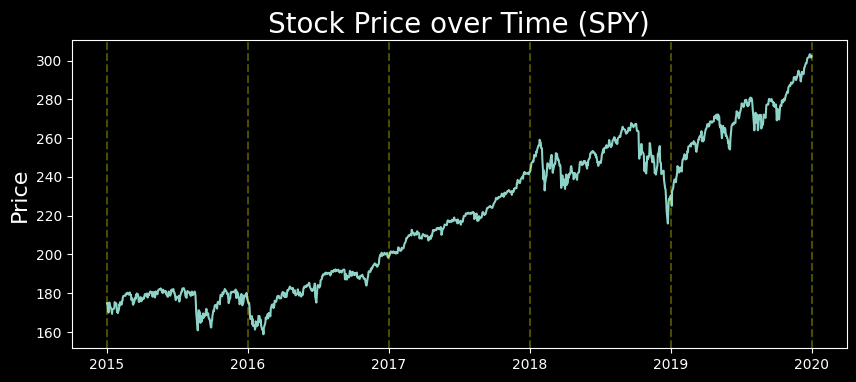

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df.Close)
plt.title('Stock Price over Time (%s)'%sym, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='yellow', linestyle='--', alpha=0.3)

Seems to us the data is not stationary

**Bring data to stationarity using differencing**

In [ ]:
# FIRST DIFFERENCE

oneDiff = df.Close.values[1:] - df.Close.values[:-1]
oneDiff = np.concatenate([oneDiff, [0]])

In [ ]:
df['FirstDifference'] = oneDiff

In [ ]:
df.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,174.806763,-3.156906
2015-01-05 00:00:00-05:00,171.649857,-1.616791
2015-01-06 00:00:00-05:00,170.033066,2.118759
2015-01-07 00:00:00-05:00,172.151825,3.054916
2015-01-08 00:00:00-05:00,175.206741,-1.404083


**Plotting after difference**

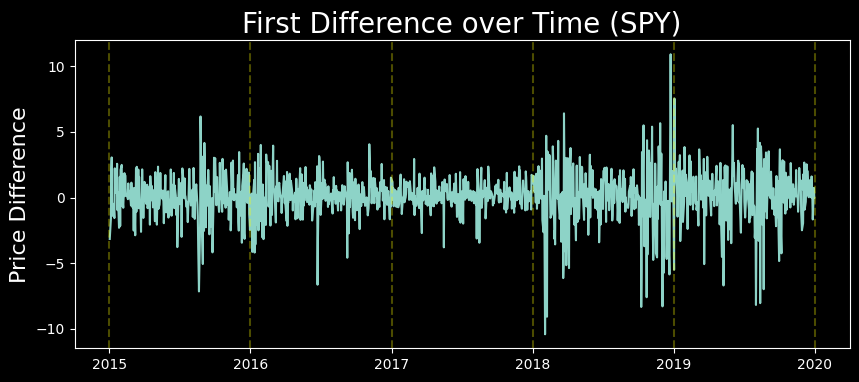

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df.FirstDifference)
plt.title('First Difference over Time (%s)'%sym, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='yellow', linestyle='--', alpha=0.3)

ACF

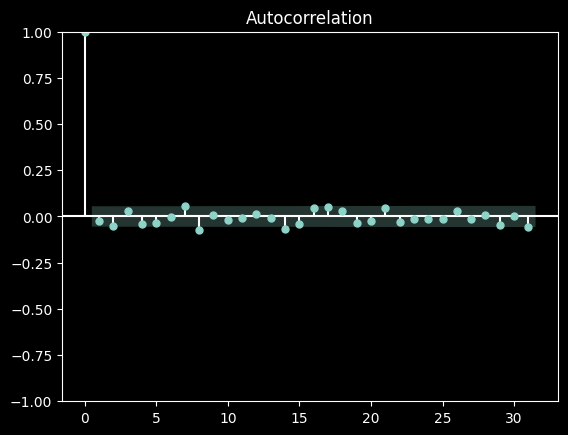

In [ ]:
acf_plot = plot_acf(df.FirstDifference)

PACF

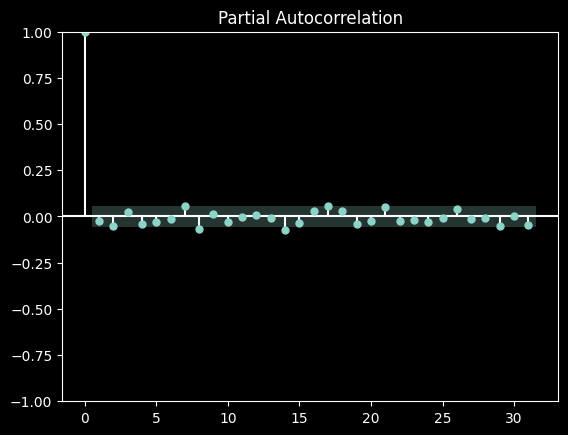

In [ ]:
pacf_plot = plot_pacf(df.FirstDifference)

<hr>

# **Understanding decomposition**

Time series decomposition is a mathematical procedure which transforms a time series into multiple different time series. The original time series is often split into 3 component series:

> **Seasonal: Patterns that repeat with a fixed period of time. For example, a website might receive more visits during weekends; this would produce data with a seasonality of 7 days.**

> **Trend: The underlying trend of the metrics. A website increasing in popularity should show a general trend that goes up.**

> **Random: Also call “noise”, “irregular” or “remainder,” this is the residuals of the original time series after the seasonal and trend series are removed.**

<hr>

# **Additive or Multiplicative Decomposition?**

**To achieve successful decomposition, it is important to choose between the additive and multiplicative models, which requires analyzing the series. For example, does the magnitude of the seasonality increase when the time series increases?**

![](http://kourentzes.com/forecasting/wp-content/uploads/2014/11/mseas.fig1_.png)


**The `statsmodels` provides the convenient `seasonal_decompose` function to perform such decomposition out of the box. Details of this function are available [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html).**

Let's use this function to perform following tasks:
1. Import `seasonal_decompose` from statsmodels.
2. Apply `seasonal_decompose` to log transformed TS.
3. Plot the trend, seasonality and residual.

**Data Loading**

In [ ]:
df = pd.read_csv('/content/data_for_TS.csv')

**Inspection**

In [ ]:
df.head()

,Time,Total arrivals
0,Jan-1976,203000
1,Feb-1976,137000
2,Mar-1976,119000
3,Apr-1976,102100
4,May-1976,129000


**Converting the `Date` into date and making it as index**

In [ ]:
df['Time'] = pd.to_datetime(df.Time)

In [ ]:
df.set_index('Time',inplace = True)

**Visualize**

Text(0, 0.5, 'Arrivals')

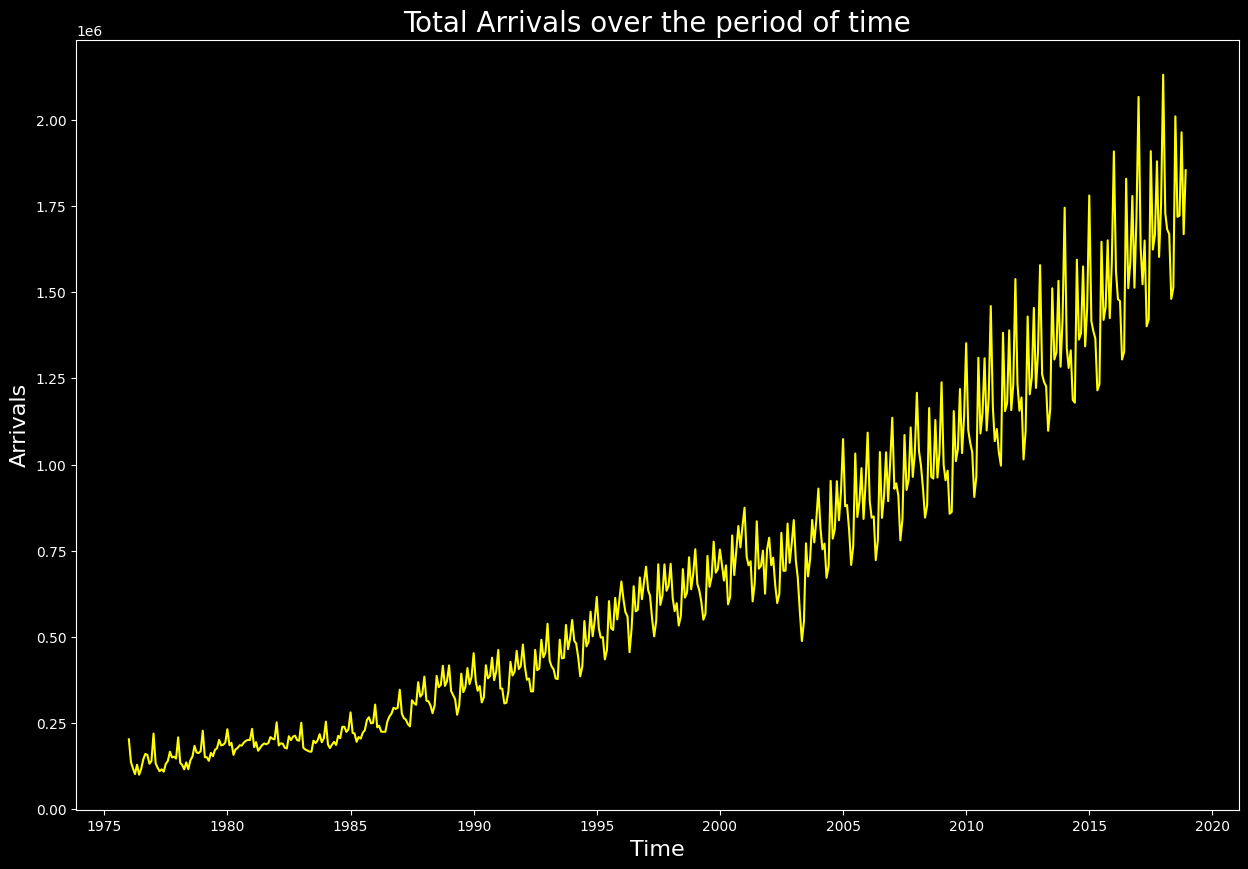

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df['Total arrivals'], color = 'yellow')
plt.title('Total Arrivals over the period of time', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Arrivals', fontsize=16)

**Insights**
  * **There is a significant and clear sign of trend. Moreover, a very strong seasonal pattern**

  * **There is some irregularity around 1980 - 1985 and after 2005**

In [ ]:
strDate = pd.to_datetime('Jan-2005')
df = df[strDate:]

In [ ]:
df.head()

,Total arrivals
Time,
2005-01-01,1073800
2005-02-01,879100
2005-03-01,882600
2005-04-01,809600
2005-05-01,708700


Text(0, 0.5, 'Arrivals')

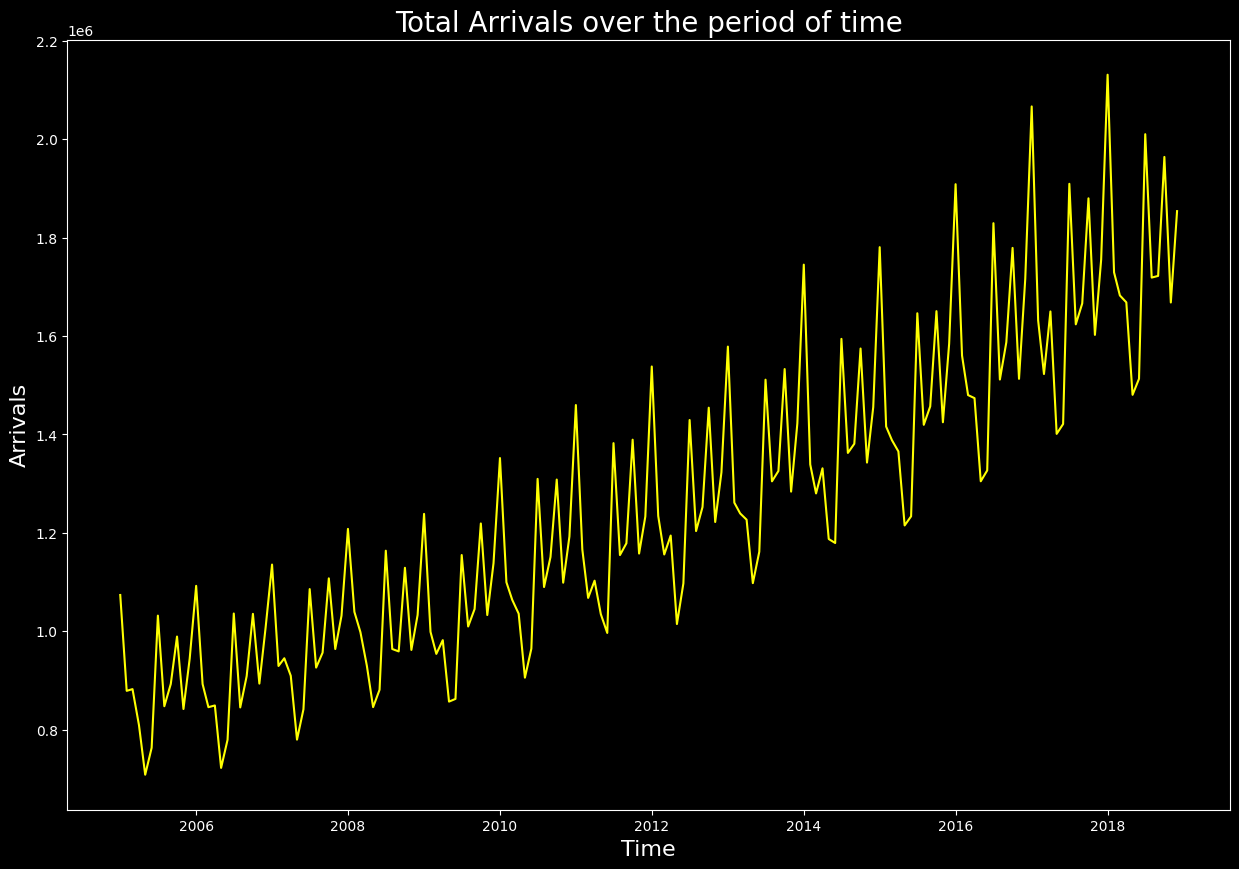

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df['Total arrivals'], color = 'yellow')
plt.title('Total Arrivals over the period of time', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Arrivals', fontsize=16)

# **Decomposition**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result = seasonal_decompose(df, model='additive', period=30)

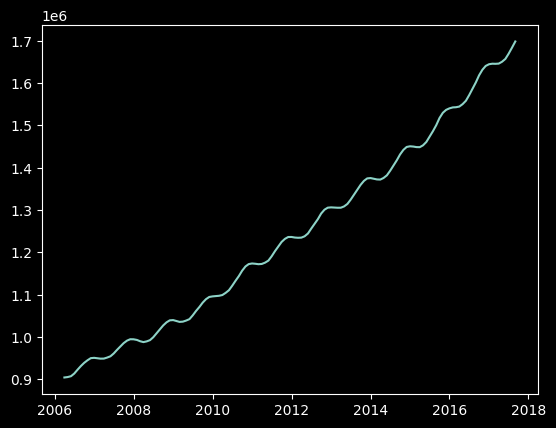

In [ ]:
plt.plot(result.trend)

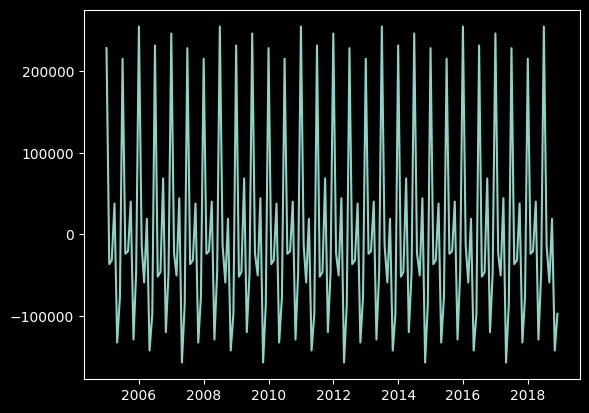

In [ ]:
plt.plot(result.seasonal)

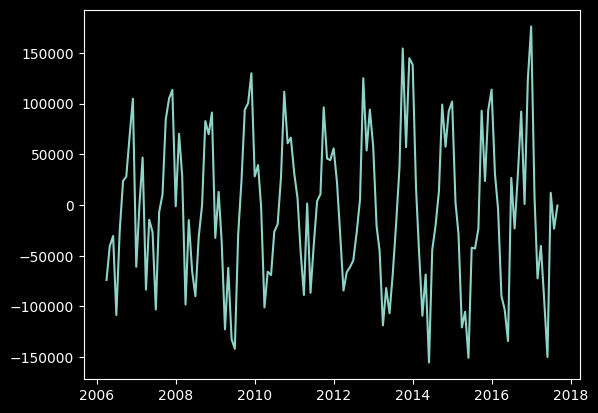

In [ ]:
plt.plot(result.resid)

<hr>

# **Generic Q&A**

* **1. What is Time series analysis**    

  **Time Series is a series of observations taken at specified time intervals usually equal intervals. Analysis of the series helps us to predict future values based on previous observed values. In Time series, we have only 2 variables, time & the variable we want to forecast.**


<hr>

* **2. What are the components of Time Series?**

  **There are 4 components:**
  * **a) Trend - Upward & downward movement of the data with time over a large period of time. Eq: Appreciation of Dollar vs rupee.**
  * **b) Seasonality - seasonal variances. Eq: Ice cream sales increases in Summer only**
  * **c) Noise or Irregularity - Spikes & troughs at random intervals**
  * **d) Cyclicity - behavior that repeats itself after large interval of time, like months, years etc.**

<hr>

* **3. What is Stationarity?**
  
  **Before applying any statistical model on a Time Series, the series has to be staionary, which means that, over different time periods,**
  * **a) It should have constant mean.**
  * **b) It should have constant variance or standard deviation.**
  * **c) Auto-covariance should not depend on time.**

  Trend & Seasonality are two reasons why a Time Series is not stationary & hence need to be corrected.

<hr>
<hr>

# **Case Study - Air_Passengers (Detailed)**

<hr>

# **Step 1 - Import the libraries**

**1. Configuration libraries**

In [ ]:
!pip install pmdarima
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.7 MB/s eta 0:00:00


**2. Mandatory ones**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('dark_background')

**3. Machine Learning Libraries and evaluations**

In [ ]:
import itertools
import pmdarima as pm
from sklearn.metrics import *
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<hr>

# **Step 2 - Data Loading**

In [ ]:
df = pd.read_csv('AirPassengers.csv')

In [ ]:
df.head().style.set_properties(
    **{
    'background-color':'#F0CA86',
    'border-color':'black',
    'color':'black',
    'border-style':'solid'
})

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<hr>

**Data Inspection**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


**Insight**
  * **Month needs to be converted into time**

In [ ]:
df["Month"] = pd.to_datetime(df['Month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<hr>

**If I need everything with respect to time, what needs to done?**

In [ ]:
df = df.set_index(['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<hr>

**Visualization of the current dataset**

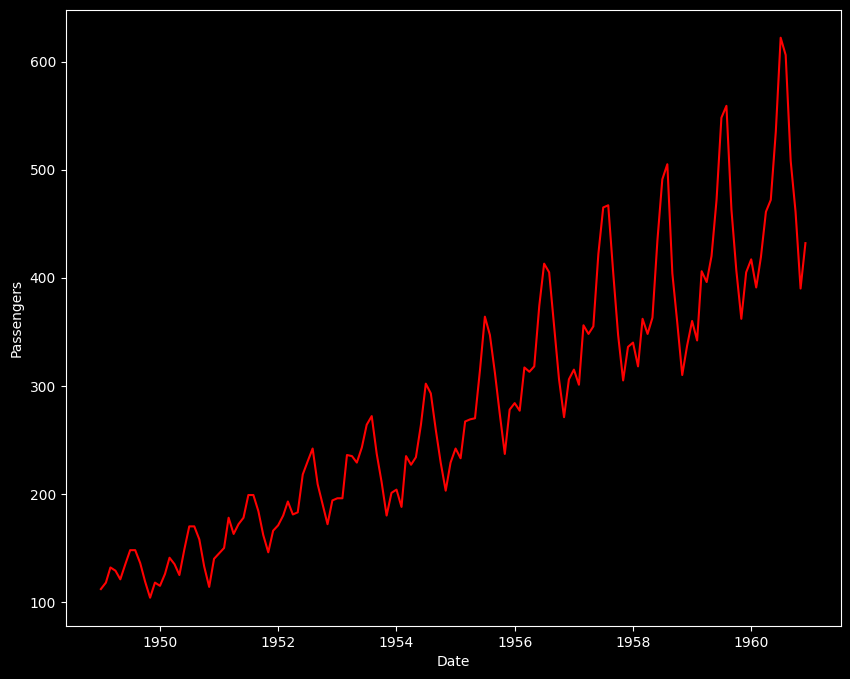

In [ ]:
plt.figure(figsize = (10, 8))
plt.xlabel('Date')
plt.ylabel("Passengers")
plt.plot(df, color = 'red')

**It seems to us that there are trend and seasonal components in the data, hence to move forward with TS, we need to make the data stationary**

<hr>

# **Step 3 - Check for the stationarity**

**Custom Helper Function**

  * Rolling Statistic Visualization
  * Stationarity Check

In [ ]:
def rollingFunc(df):
  # Statistics
  rolling_mean = df.rolling(window = 12).mean()
  rolling_std = df.rolling(window = 12).std()


  # Visualization
  original_data = plt.plot(df, color = "red", label = 'Original Data')
  mean = plt.plot(rolling_mean, color = 'yellow', label = 'Rolling Mean')
  std = plt.plot(rolling_std, color = 'blue', label = "Rolling Standard Deviation")
  plt.legend(loc = 'best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

In [ ]:
# Stationarity
def stationary(df):
  print("The result of Stationary of Data")
  results = adfuller(df, autolag = 'AIC')


  df_res = pd.Series(results[1:4], index = ['P-value', 'Lags Used', "Number of observation used"])
  print(df_res)

  if results[1] > 0.05:
    print('The time series is not stationary')
  else:
    print('The time series is stationary')

Manual approach

In [ ]:
rolling_mean = df.rolling(window = 12).mean()
rolling_mean.dropna()

,#Passengers
Month,
1949-12-01,126.666667
1950-01-01,126.916667
1950-02-01,127.583333
1950-03-01,128.333333
1950-04-01,128.833333
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


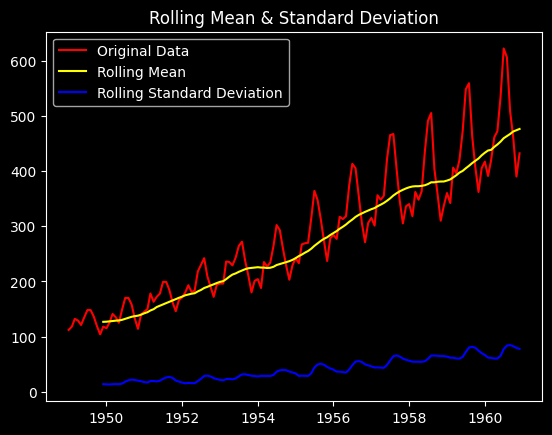

In [ ]:
rollingFunc(df)

**From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.**

**To further augment our hypothesis that the time series is not stationary, let us perform the ADF test.**

In [ ]:
stationary(df)

The result of Stationary of Data
P-value                         0.99188
Lags Used                      13.00000
Number of observation used    130.00000
dtype: float64
The time series is not stationary


<hr>

# **Step 4 - Acheiving the stationarity**

**There are a couple of ways to achieve stationarity through data transformation like taking  log10, loge, square, square root, cube, cube root, exponential decay, time shift and so on ...**

**In our notebook, lets start of with log transformations. Our objective is to remove the trend component. Hence, flatter curves( ie: paralle to x-axis) for time series and rolling mean after taking log would say that our data transformation did a good job**

**Apply the Log Transformation**

In [ ]:
# Estimated Trend
df_log = np.log(df)

Visualize

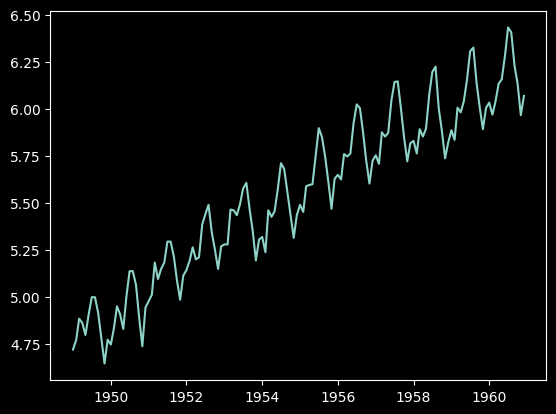

In [ ]:
plt.plot(df_log)

Implementing the rolliing stats to check if we have stationarity

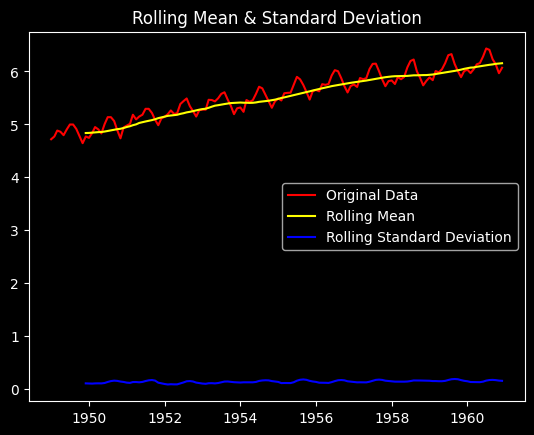

In [ ]:
rollingFunc(df_log)

In [ ]:
stationary(df_log)

The result of Stationary of Data
P-value                         0.422367
Lags Used                      13.000000
Number of observation used    130.000000
dtype: float64
The time series is not stationary


<hr>

**Differencing**

In [ ]:
rolling_mean = df_log.rolling(window = 12).mean()

In [ ]:
logMinusRollingMean = df_log - rolling_mean

In [ ]:
logMinusRollingMean.dropna(inplace = True)
logMinusRollingMean

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


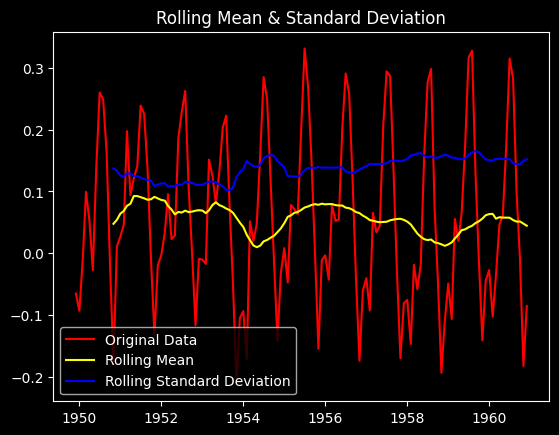

In [ ]:
rollingFunc(logMinusRollingMean)

In [ ]:
stationary(logMinusRollingMean)

The result of Stationary of Data
P-value                         0.022235
Lags Used                      13.000000
Number of observation used    119.000000
dtype: float64
The time series is stationary


<hr>

**Time Shift Transformation**

In [ ]:
dfLogShift = df_log - df_log.shift()

Visualize

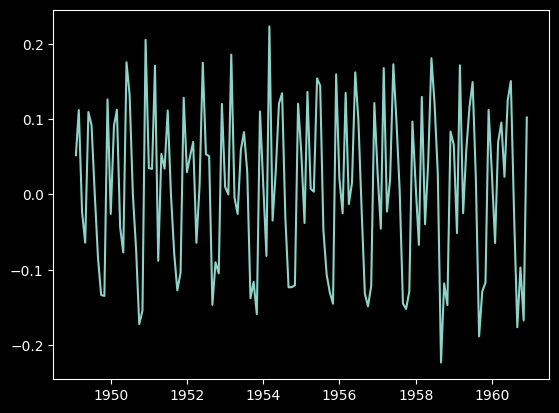

In [ ]:
plt.plot(dfLogShift)

In [ ]:
dfLogShift.dropna(inplace = True)

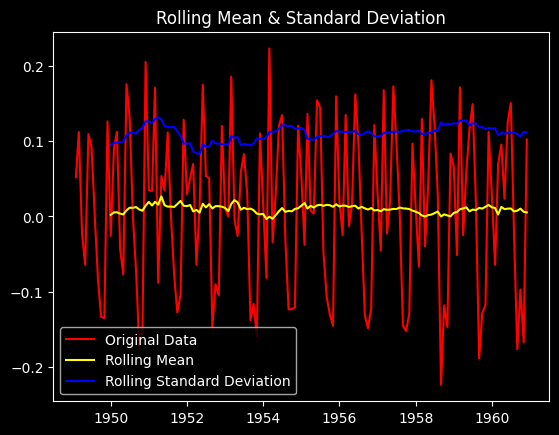

In [ ]:
rollingFunc(dfLogShift)

In [ ]:
stationary(dfLogShift)

The result of Stationary of Data
P-value                         0.071121
Lags Used                      14.000000
Number of observation used    128.000000
dtype: float64
The time series is not stationary


**diff()**

In [ ]:
dfLogShift2 = df_log.diff().diff()

In [ ]:
dfLogShift2.dropna(inplace = True)

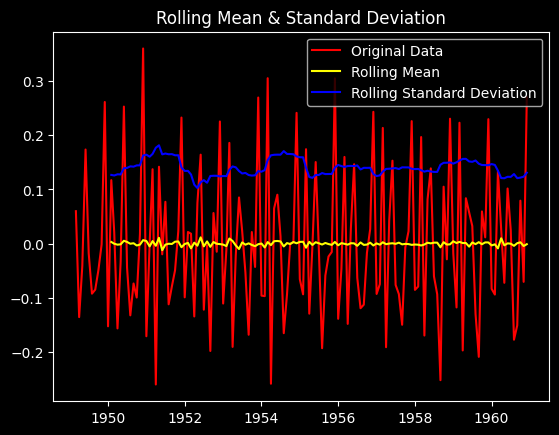

In [ ]:
rollingFunc(dfLogShift2)

In [ ]:
stationary(dfLogShift2)

The result of Stationary of Data
P-value                       7.419305e-13
Lags Used                     1.300000e+01
Number of observation used    1.280000e+02
dtype: float64
The time series is stationary


**We have tried out 3 different transformation: `log` & `time shift`. For simplicity, we will go with the `log` scale. The reason for doing this is that we can revert back to the original scale during forecasting.**

<hr>

**Let us now break down the 3 components of the `log` scale series using a system libary function. Once, we separate our the components, we can simply ignore `trend` & `seasonality` and check on the nature of the `residual` part.**

<hr>

# **Step 5 - Decomposition**

In [ ]:
decomposition = seasonal_decompose(df_log)

Segragate the data

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Visualize

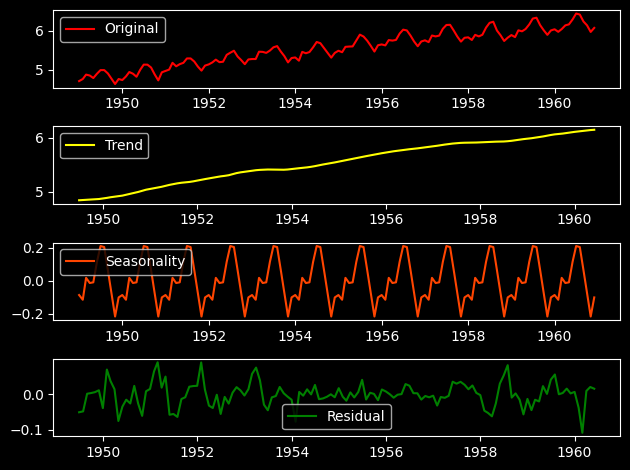

In [ ]:
plt.subplot(411)
plt.plot(df_log, label = 'Original',color = 'red')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend',color = 'yellow')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality',color = 'orangered')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residual',color = 'green')
plt.legend(loc = 'best')

plt.tight_layout()

<hr>

# **Step 6 - ACF & PACF values for series**

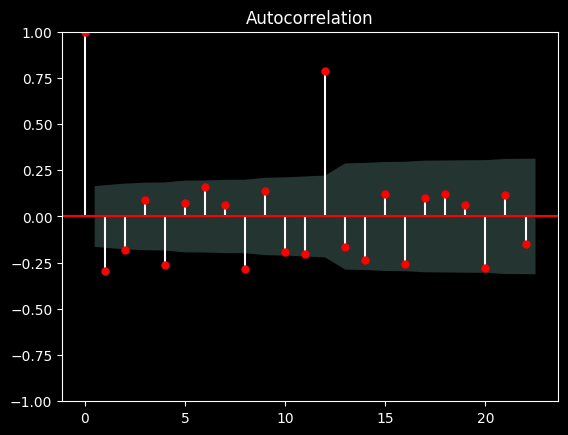

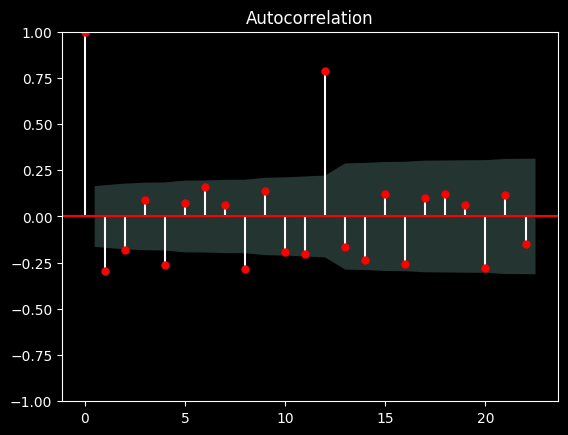

In [ ]:
plot_acf(dfLogShift2, color = 'red')

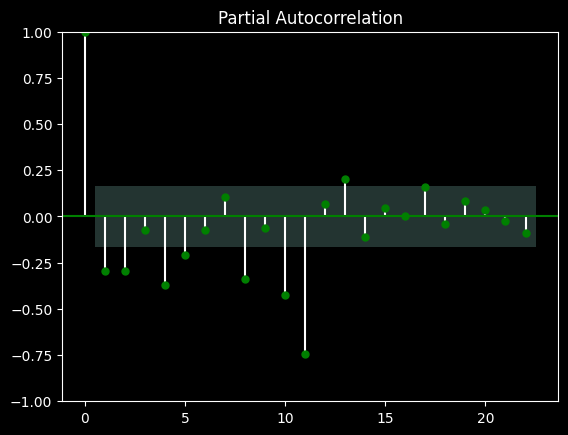

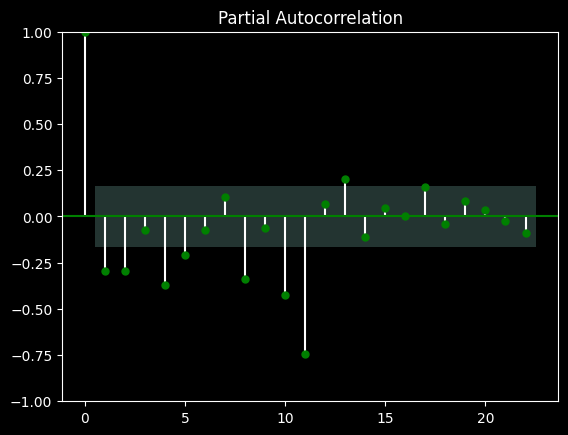

In [ ]:
plot_pacf(dfLogShift2, color = 'green')

AR Model : D = 2, Q = 4

In [ ]:
model = ARIMA(dfLogShift2, order = (4, 2, 0))
res = model.fit()

In [ ]:
res

In [ ]:
results = pd.DataFrame(res.fittedvalues)

Text(0.5, 1.0, 'RSS: 5.4476')

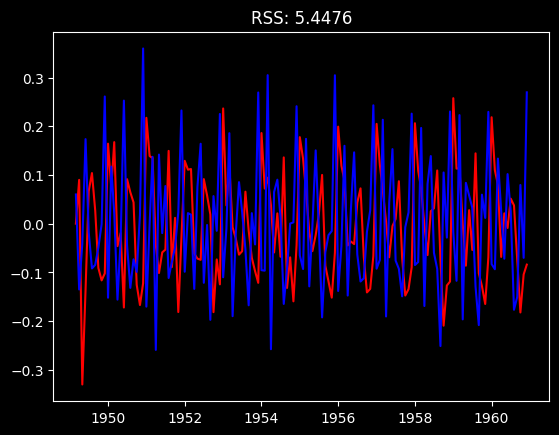

In [ ]:
plt.plot(results, color='red', label = 'Projected Values')
plt.plot(dfLogShift2, color = 'Blue', label = 'Data')
plt.title('RSS: %.4f'%sum((res.fittedvalues - dfLogShift2['#Passengers'])**2))

MA Model

In [ ]:
model = ARIMA(dfLogShift2, order = (0, 2, 4))
res = model.fit()

In [ ]:
res

In [ ]:
results = pd.DataFrame(res.fittedvalues)

Text(0.5, 1.0, 'RSS: 2.0661')

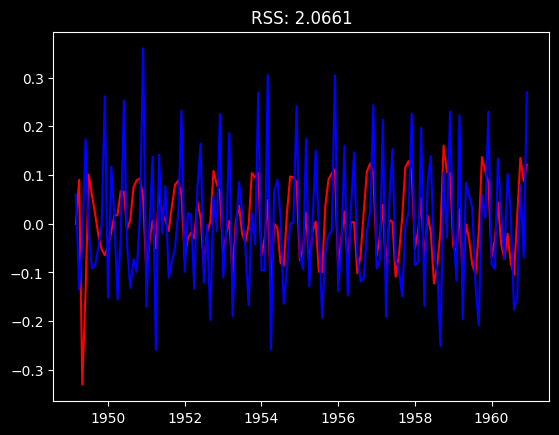

In [ ]:
plt.plot(results, color='red', label = 'Projected Values')
plt.plot(dfLogShift2, color = 'Blue', label = 'Data')
plt.title('RSS: %.4f'%sum((res.fittedvalues - dfLogShift2['#Passengers'])**2))

ARIMA

In [ ]:
model = ARIMA(dfLogShift2, order = (4, 2, 4))
res = model.fit()

Figure(1000x800)


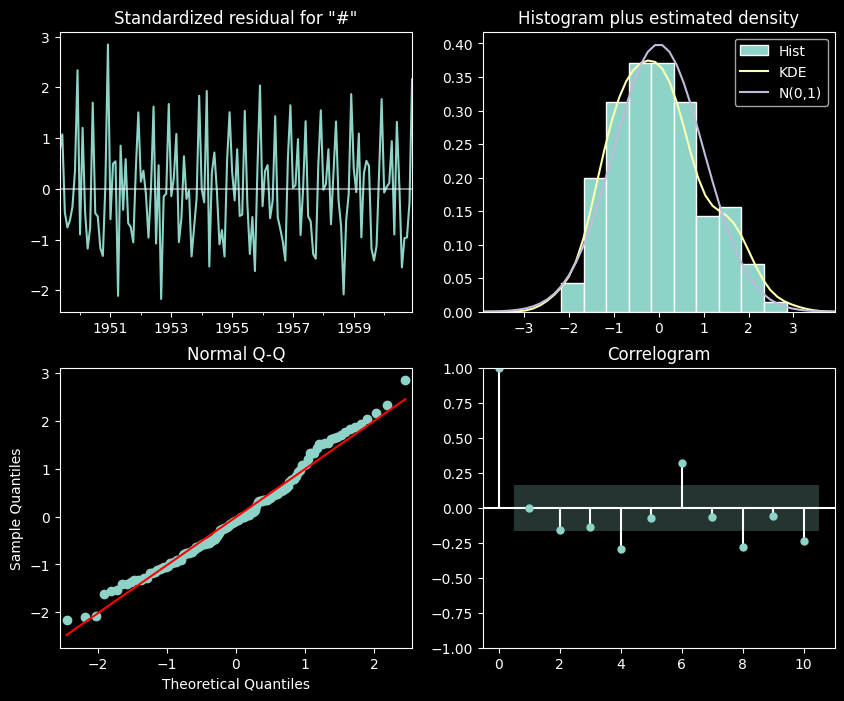

In [ ]:
print(res.plot_diagnostics(figsize=(10,8)))

In [ ]:
results = pd.DataFrame(res.fittedvalues)

Text(0.5, 1.0, 'RSS: 2.2703')

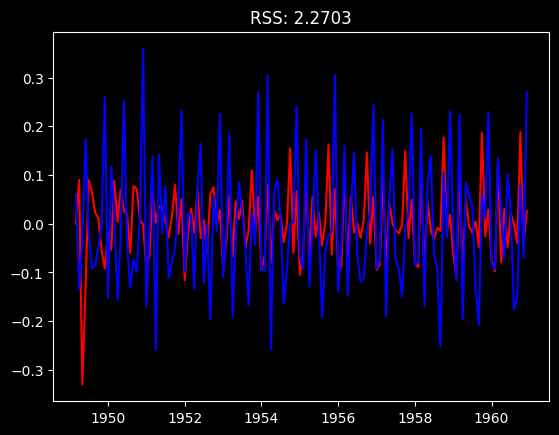

In [ ]:
plt.plot(results, color='red', label = 'Projected Values')
plt.plot(dfLogShift2, color = 'Blue', label = 'Data')
plt.title('RSS: %.4f'%sum((res.fittedvalues - dfLogShift2['#Passengers'])**2))

<hr>

# **Step 8 - Introduction to itertools**

**AIC: Akaike Information Criterion is like the MSE in regression, lower the value better the model**

In [ ]:
# Create a range for iteration
p = q = range(0, 5)
# Creating a differecning range
d = range(0, 3)

In [ ]:
# Combination
pdq = list(itertools.product(p, d, q))

In [ ]:
# Dictionary and list
dict_range = {}
list_aic = []

In [ ]:
for x in pdq:
  model = ARIMA(dfLogShift2, order = x)
  results = model.fit()
  list_aic.append(results.aic)
  dict_range['AIC'] = list_aic
  dict_range['Range'] = pdq

In [ ]:
df_pdq = pd.DataFrame(dict_range)

ValueError: All arrays must be of the same length

In [ ]:
# Creating a range for the required values
p = q = range(0, 5)
# Creating range for differencing
d = [0, 3]
# Taking combination
pdq = list(itertools.product(p, d, q))
# dictionary for adding all the values
dict_range = {}
list_aic = []
# running loop for the best value for p, d, q
for x in pdq:
  try:
    model = ARIMA(dfLogShift2, order = x)
    results = model.fit()
    list_aic.append(results.aic)
    dict_range['AIC'] = list_aic
    dict_range['Order'] = pdq
    print(f'The order is : {x}, AIC = {results.aic}')

  except:
    continue

The order is : (0, 0, 0), AIC = -162.7134303547918
The order is : (0, 0, 1), AIC = -222.12248433032312
The order is : (0, 0, 2), AIC = -228.41119710220565
The order is : (0, 0, 3), AIC = -230.52620603158266
The order is : (0, 0, 4), AIC = -246.68238754141862
The order is : (0, 3, 0), AIC = 291.74445571431437
The order is : (0, 3, 1), AIC = 133.8450769449057
The order is : (0, 3, 2), AIC = -9.618953963845286
The order is : (0, 3, 3), AIC = -56.88573195653906
The order is : (0, 3, 4), AIC = -54.89365780711131
The order is : (1, 0, 0), AIC = -173.73789310086238
The order is : (1, 0, 1), AIC = -226.28832408411375
The order is : (1, 0, 2), AIC = -231.9627839350655
The order is : (1, 0, 3), AIC = -230.26184076381017
The order is : (1, 0, 4), AIC = -228.08025614210828
The order is : (1, 3, 0), AIC = 197.46565872114724
The order is : (1, 3, 1), AIC = 61.05706572585427
The order is : (1, 3, 2), AIC = -53.06034543067938
The order is : (1, 3, 3), AIC = -5.712787097444538
The order is : (1, 3, 4),

In [ ]:
df_pdq = pd.DataFrame(dict_range)

In [ ]:
df_pdq

,AIC,Order
0,-162.713430,"(0, 0, 0)"
1,-222.122484,"(0, 0, 1)"
2,-228.411197,"(0, 0, 2)"
3,-230.526206,"(0, 0, 3)"
4,-246.682388,"(0, 0, 4)"
5,291.744456,"(0, 3, 0)"
6,133.845077,"(0, 3, 1)"
7,-9.618954,"(0, 3, 2)"
8,-56.885732,"(0, 3, 3)"
9,-54.893658,"(0, 3, 4)"


In [ ]:
best_AIC = df_pdq[df_pdq['AIC']==df_pdq['AIC'].min()]

In [ ]:
best_AIC

,AIC,Order
43,-257.161189,"(4, 0, 3)"


In [ ]:
model = ARIMA(dfLogShift2, order = (4, 0, 3))
res = model.fit()

In [ ]:
res

In [ ]:
results = pd.DataFrame(res.fittedvalues)

Text(0.5, 1.0, 'RSS: 1.1886')

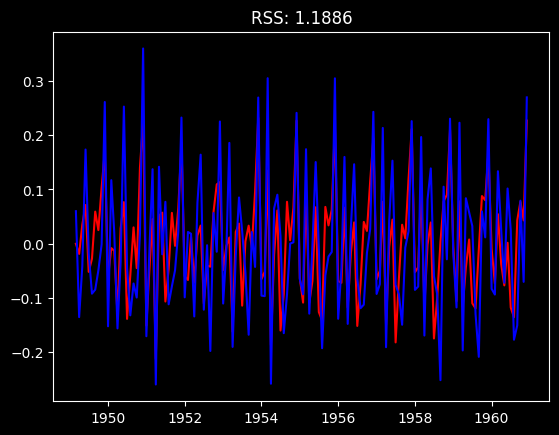

In [ ]:
plt.plot(results, color='red', label = 'Projected Values')
plt.plot(dfLogShift2, color = 'Blue', label = 'Data')
plt.title('RSS: %.4f'%sum((res.fittedvalues - dfLogShift2['#Passengers'])**2))